In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [3]:
df_dssalarios=pd.read_csv(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\salarios DS 2023\ds_salaries.csv")

In [4]:
df_dssalarios.head(1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L


In [5]:
#creo un diccionario con la columnas traducidas
diccionario_traducciones = {
    'work_year': 'año laboral',
    'experience_level': 'nivel de experiencia',
    'employment_type': 'tipo de empleo',
    'job_title': 'nombre del puesto',
    'salary': 'salario',
    'salary_currency': 'moneda del salario',
    'salary_in_usd': 'salario en USD',
    'employee_residence': 'residencia del empleado',
    'remote_ratio': 'proporción remota',
    'company_location': 'ubicación de la empresa',
    'company_size': 'tamaño de la empresa'}

In [6]:
# HAGO UN NUEVO DF CON LAS COLUMNS TRADUCIDAS
df_dssalarios.rename(columns=diccionario_traducciones, inplace=True)
df_dssalarios.head(2)

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [7]:
def empleo2(tipo):
    if tipo == "FT":
        return "Un empleado a tiempo completo trabaja las horas estándar o requeridas por la empresa, generalmente al menos 40 horas a la semana"
    elif tipo == "PT":
        return "Un empleado a tiempo parcial trabaja un número reducido de horas en comparación con un empleado a tiempo completo. Las horas pueden variar, pero generalmente son menos de 30 horas a la semana."
    elif tipo == "CT":
        return "Un empleado contratado tiene un acuerdo laboral por un período específico o para un proyecto particular. La relación laboral puede finalizar una vez que se complete el contrato."
    elif tipo == "FL":
        return "Un trabajador independiente trabaja de manera autónoma y generalmente es contratado por proyectos específicos. No está vinculado a una empresa de manera permanente"
    
# asigno categoria al df_ciber_salrio
df_dssalarios['significado del empleo'] = df_dssalarios['tipo de empleo'].apply(empleo2)

In [8]:
# prosigo con la columna nivel de experiecnia
def certificacion (tipo): 
    if tipo == "EN":
        return "Entry-Level (Nivel de Entrada"
    elif tipo =="SE":
        return "Security Expert (Experto en Seguridad)"
    elif tipo =="MI":
        return "Mid-Level (Nivel Intermedio)"
    elif tipo =="EX":
        return "High Experienced"

 #asigno categoria al df_ciber_salrio
df_dssalarios['tipo de experiencia'] = df_dssalarios['nivel de experiencia'].apply(certificacion)

In [9]:
#prosigo con la columna nivel de experiecnia
def certificacion2 (tipo): 
    if tipo == "EN":
        return "Indica un nivel básico de habilidades y experiencia, generalmente adecuado para personas que están comenzando en el campo."
    elif tipo =="SE":
        return "Indica un nivel de experiencia más avanzado en el ámbito de la seguridad informática. Los profesionales con esta designación suelen tener habilidades especializadas en seguridad."
    elif tipo =="MI":
        return "Indica un nivel intermedio de habilidades y experiencia. Las personas en este nivel han adquirido experiencia adicional después del nivel de entrada."
    elif tipo =="EX":
        return "Indica un nivel de experiencia muy expecializado en un ambito muy concreto dentro de la ciberseguridad"

 #asigno categoria al df_ciber_salrio
df_dssalarios['aptitudes por tipo de experiencia'] = df_dssalarios['nivel de experiencia'].apply(certificacion2)

In [10]:
df_dssalarios["nombre del puesto"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [12]:
puestos_trabajo_DS = {
    'Principal Data Scientist': 'Científico de Datos Principal',
    'ML Engineer': 'Ingeniero de Aprendizaje Automático (ML)',
    'Data Scientist': 'Científico de Datos',
    'Applied Scientist': 'Científico Aplicado',
    'Data Analyst': 'Analista de Datos',
    'Data Modeler': 'Modelador de Datos',
    'Research Engineer': 'Ingeniero de Investigación',
    'Analytics Engineer': 'Ingeniero de Analítica',
    'Business Intelligence Engineer': 'Ingeniero de Inteligencia de Negocios',
    'Machine Learning Engineer': 'Ingeniero de Aprendizaje Automático',
    'Data Strategist': 'Estratega de Datos',
    'Data Engineer': 'Ingeniero de Datos',
    'Computer Vision Engineer': 'Ingeniero de Visión Artificial',
    'Data Quality Analyst': 'Analista de Calidad de Datos',
    'Compliance Data Analyst': 'Analista de Datos de Conformidad',
    'Data Architect': 'Arquitecto de Datos',
    'Applied Machine Learning Engineer': 'Ingeniero de Aprendizaje Automático Aplicado',
    'AI Developer': 'Desarrollador de IA',
    'Research Scientist': 'Científico de Investigación',
    'Data Analytics Manager': 'Gerente de Análisis de Datos',
    'Business Data Analyst': 'Analista de Datos de Negocios',
    'Applied Data Scientist': 'Científico de Datos Aplicado',
    'Staff Data Analyst': 'Analista de Datos con Experiencia',
    'ETL Engineer': 'Ingeniero de ETL',
    'Data DevOps Engineer': 'Ingeniero de DevOps de Datos',
    'Head of Data': 'Director de Datos',
    'Data Science Manager': 'Gerente de Ciencia de Datos',
    'Data Manager': 'Gerente de Datos',
    'Machine Learning Researcher': 'Investigador de Aprendizaje Automático',
    'Big Data Engineer': 'Ingeniero de Big Data',
    'Data Specialist': 'Especialista en Datos',
    'Lead Data Analyst': 'Analista de Datos Principal',
    'BI Data Engineer': 'Ingeniero de Datos de BI (Business Intelligence)',
    'Director of Data Science': 'Director de Ciencia de Datos',
    'Machine Learning Scientist': 'Científico de Aprendizaje Automático',
    'MLOps Engineer': 'Ingeniero de MLOps (Machine Learning Operations)',
    'AI Scientist': 'Científico de IA (Inteligencias Artificial)',
    'Autonomous Vehicle Technician': 'Técnico de Vehículos Autónomos',
    'Applied Machine Learning Scientist': 'Científico de Aprendizaje Automático Aplicado',
    'Lead Data Scientist': 'Científico de Datos Principal',
    'Cloud Database Engineer': 'Ingeniero de Bases de Datos en la Nube',
    'Financial Data Analyst': 'Analista de Datos Financieros',
    'Data Infrastructure Engineer': 'Ingeniero de Infraestructura de Datos',
    'Software Data Engineer': 'Ingeniero de Software de Datos',
    'AI Programmer': 'Programador de IA',
    'Data Operations Engineer': 'Ingeniero de Operaciones de Datos',
    'BI Developer': 'Desarrollador de BI',
    'Data Science Lead': 'Líder de Ciencia de Datos',
    'Deep Learning Researcher': 'Investigador de Deep Learning',
    'BI Analyst': 'Analista de BI',
    'Data Science Consultant': 'Consultor de Ciencia de Datos',
    'Data Analytics Specialist': 'Especialista en Análisis de Datos',
    'Machine Learning Infrastructure Engineer': 'Ingeniero de Infraestructura de Aprendizaje Automático',
    'BI Data Analyst': 'Analista de Datos de BI',
    'Head of Data Science': 'Director de Ciencia'}


In [13]:
df_dssalarios["nombre del puesto"] = df_dssalarios["nombre del puesto"].replace(puestos_trabajo_DS)

In [14]:
df_dssalarios.head()

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa,significado del empleo,tipo de experiencia,aptitudes por tipo de experiencia
0,2023,SE,FT,Científico de Datos Principal,80000,EUR,85847,ES,100,ES,L,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...
1,2023,MI,CT,Ingeniero de Aprendizaje Automático (ML),30000,USD,30000,US,100,US,S,Un empleado contratado tiene un acuerdo labora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
2,2023,MI,CT,Ingeniero de Aprendizaje Automático (ML),25500,USD,25500,US,100,US,S,Un empleado contratado tiene un acuerdo labora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
3,2023,SE,FT,Científico de Datos,175000,USD,175000,CA,100,CA,M,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...
4,2023,SE,FT,Científico de Datos,120000,USD,120000,CA,100,CA,M,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...


In [15]:
df_dssalarios.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V_NEW\proyecto EDA\DATASETS\DATASET ORIGINALES\salarios DS 2023\salarios_ds.xlsx", index=False)

In [28]:
# CARDINALIDAD
cardinalidad = pd.DataFrame([df_dssalarios.nunique(), df_dssalarios.nunique()/len(df_dssalarios)*100, df_dssalarios.dtypes]).T.rename(columns ={0:"card",\
                                                                                                                                    1: "%_card", 2: "Tipo"})
cardinalidad.Tipo.value_counts()

Tipo
object    10
int64      4
Name: count, dtype: int64

In [16]:
def obtener_estadisticas(df):

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        datos['porcentaje_cardinalidad'] = round(df[col].nunique() / len(df) * 100, 2)
        datos['Tipo'] = df[col].dtype
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['media'] = round(df[col].mean(), 2)
            datos['moda'] = "No"
            datos['std'] = round(df[col].std(), 2)
            datos['var'] = round(df[col].var(), 2)
            datos['Q1'] = round(df[col].quantile(0.25), 2)
            datos['mediana'] = round(df[col].median(), 2)
            datos['Q3'] = round(df[col].quantile(0.75), 2)
            datos['Categoria'] = 'numerica continua' if df[col].nunique() > 10 else 'numerica discreta'
        else:
            datos['media'] = "No"
            datos['moda'] = df[col].mode().iloc[0] if not df[col].mode().empty else "No"
            datos['std'] = "No"
            datos['var'] = "No"
            datos['Q1'] = "No"
            datos['mediana'] = "No"
            datos['Q3'] = "No"
            datos['Categoria'] = 'categorica ordinal' if df[col].nunique() > 2 else 'categorica nominal'
        datos['porcentaje_NaN'] = round(df[col].isna().mean() * 100, 2)
        resultado[col] = pd.Series(datos)
    return resultado.transpose()




In [17]:
obtener_estadisticas(df_dssalarios)


,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
año laboral,0.11,int64,2022.37,No,0.69,0.48,2022.0,2022.0,2023.0,numerica discreta,0.0
nivel de experiencia,0.11,object,No,SE,No,No,No,No,No,categorica ordinal,0.0
tipo de empleo,0.11,object,No,FT,No,No,No,No,No,categorica ordinal,0.0
nombre del puesto,2.45,object,No,Ingeniero de Datos,No,No,No,No,No,categorica ordinal,0.0
salario,21.7,int64,190695.57,No,671676.5,451149321334.549988,100000.0,138000.0,180000.0,numerica continua,0.0
moneda del salario,0.53,object,No,USD,No,No,No,No,No,categorica ordinal,0.0
salario en USD,27.56,int64,137570.39,No,63055.63,3976011879.23,95000.0,135000.0,175000.0,numerica continua,0.0
residencia del empleado,2.08,object,No,US,No,No,No,No,No,categorica ordinal,0.0
proporción remota,0.08,int64,46.27,No,48.59,2360.9,0.0,0.0,100.0,numerica discreta,0.0
ubicación de la empresa,1.92,object,No,US,No,No,No,No,No,categorica ordinal,0.0


In [19]:

def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2, 2)


c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\victo\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


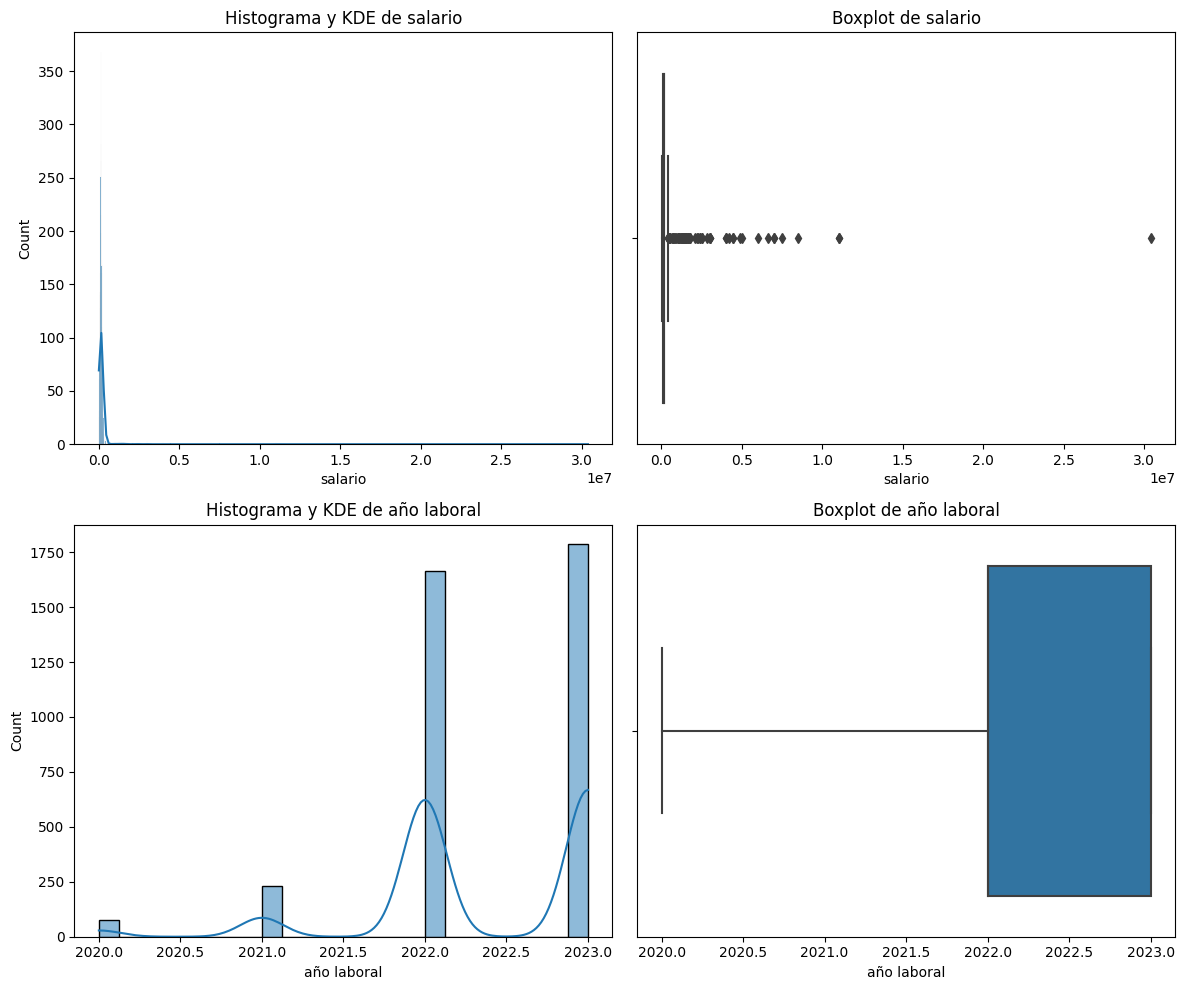

In [21]:
plot_combined_graphs(df_dssalarios, ["salario", "año laboral"], whisker_width= 3) # 3 veces la longitud habitual (que es 1.5*IQR)

# en el plotbox el valor maximo (mediana+1,5 * IQR), el 1.5 es estimado y podemos apmpliarlo lo suyo es empezar 3 veces mas e ir bajando a nuestras necesidades.
# en este caso es mejor dejarlo en 1.5 y vemos que hay outliers despues del maximo, para ello binnearemos(convertir variables continuas en variables categorigas discretas
# a traves de ka creacion de bins)

In [25]:
df_dssalarios

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa,significado del empleo,tipo de experiencia,aptitudes por tipo de experiencia
0,2023,SE,FT,Científico de Datos Principal,80000,EUR,85847,ES,100,ES,L,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...
1,2023,MI,CT,Ingeniero de Aprendizaje Automático (ML),30000,USD,30000,US,100,US,S,Un empleado contratado tiene un acuerdo labora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
2,2023,MI,CT,Ingeniero de Aprendizaje Automático (ML),25500,USD,25500,US,100,US,S,Un empleado contratado tiene un acuerdo labora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
3,2023,SE,FT,Científico de Datos,175000,USD,175000,CA,100,CA,M,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...
4,2023,SE,FT,Científico de Datos,120000,USD,120000,CA,100,CA,M,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Científico de Datos,412000,USD,412000,US,100,US,L,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...
3751,2021,MI,FT,Científico de Datos Principal,151000,USD,151000,US,100,US,L,Un empleado a tiempo completo trabaja las hora...,Mid-Level (Nivel Intermedio),Indica un nivel intermedio de habilidades y ex...
3752,2020,EN,FT,Científico de Datos,105000,USD,105000,US,100,US,S,Un empleado a tiempo completo trabaja las hora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...
3753,2020,EN,CT,Analista de Datos de Negocios,100000,USD,100000,US,100,US,L,Un empleado contratado tiene un acuerdo labora...,Entry-Level (Nivel de Entrada,Indica un nivel básico de habilidades y experi...


In [26]:
df_dssalarios.groupby(["nombre del puesto", "ubicación de la empresa"])["salario"].describe()

count      mean  \
nombre del puesto              ubicación de la empresa                    
3D Computer Vision Researcher  AL                         1.0   10000.0   
                               AS                         1.0   20000.0   
                               CR                         1.0   50000.0   
                               IN                         1.0  400000.0   
Analista de BI                 BR                         2.0   63000.0   
...                                                       ...       ...   
Product Data Scientist         SG                         1.0    8000.0   
Programador de IA              AU                         2.0   55000.0   
Staff Data Scientist           US                         1.0  105000.0   
Técnico de Vehículos Autónomos BS                         1.0   45555.0   
                               GH                         1.0    7000.0   

                                                                 std  \
nombre del puesto              ubicación de la empresa                 
3D Computer Vision Researcher  AL                                NaN   
                               AS                                NaN   
                               CR                                NaN   
                               IN                                NaN   
Analista de BI                 BR                       21213.203436   
...                                                              ...   
Product Data Scientist         SG                                NaN   
Programador de IA              AU                       21213.203436   
Staff Data Scientist           US                                NaN   
Técnico de Vehículos Autónomos BS                                NaN   
                               GH                                NaN   

                                                             min       25%  \
nombre del puesto              ubicación de la empresa                       
3D Computer Vision Researcher  AL                        10000.0   10000.0   
                               AS                        20000.0   20000.0   
                               CR                        50000.0   50000.0   
                               IN                       400000.0  400000.0   
Analista de BI                 BR                        48000.0   55500.0   
...                                                          ...       ...   
Product Data Scientist         SG                         8000.0    8000.0   
Programador de IA              AU                        40000.0   47500.0   
Staff Data Scientist           US                       105000.0  105000.0   
Técnico de Vehículos Autónomos BS                        45555.0   45555.0   
                               GH                         7000.0    7000.0   

                                                             50%       75%  \
nombre del puesto              ubicación de la empresa                       
3D Computer Vision Researcher  AL                        10000.0   10000.0   
                               AS                        20000.0   20000.0   
                               CR                        50000.0   50000.0   
                               IN                       400000.0  400000.0   
Analista de BI                 BR                        63000.0   70500.0   
...                                                          ...       ...   
Product Data Scientist         SG                         8000.0    8000.0   
Programador de IA              AU                        55000.0   62500.0   
Staff Data Scientist           US                       105000.0  105000.0   
Técnico de Vehículos Autónomos BS                        45555.0   45555.0   
                               GH                         7000.0    7000.0   

                                                             max  
nombre del puesto              ubicación de la

In [27]:
df_dssalarios.loc[df_dssalarios['ubicación de la empresa'] == 'ES'].groupby(['nombre del puesto', 'salario']).describe()

año laboral               \
                                                          count         mean   
nombre del puesto                           salario                            
Analista de Datos                           8760            1.0  2021.000000   
                                            30000           1.0  2022.000000   
                                            35000           3.0  2022.000000   
                                            38000           3.0  2022.666667   
                                            40000           1.0  2022.000000   
                                            48000           7.0  2022.428571   
                                            52000           1.0  2023.000000   
Analista de Datos de Negocios               20000           1.0  2023.000000   
Científico de Datos                         30000           1.0  2022.000000   
                                            32000           1.0  2021.000000   
                                            34000           1.0  2020.000000   
                                            36000          11.0  2022.363636   
                                            39600           1.0  2021.000000   
                                            45000          12.0  2022.416667   
                                            55000           1.0  2023.000000   
Científico de Datos Principal               80000           1.0  2023.000000   
Científico de IA (Inteligencias Artificial) 30000           1.0  2022.000000   
                                            36000           1.0  2023.000000   
                                            55000           1.0  2021.000000   
Científico de Investigación                 169200          2.0  2023.000000   
                                            253750          2.0  2023.000000   
Consultor de Ciencia de Datos               26000           1.0  2022.000000   
                                            59000           1.0  2021.000000   
Ingeniero de Aprendizaje Automático         40000           1.0  2021.000000   
Ingeniero de Big Data                       45000           1.0  2023.000000   
Ingeniero de Datos                          35000           3.0  2022.000000   
                                            40000           1.0  2022.000000   
                                            45000           1.0  2022.000000   
                                            55000           1.0  2023.000000   
                                            60000           1.0  2022.000000   
                                            62000           1.0  2023.000000   
                                            65000           3.0  2022.000000   
                                            70000           4.0  2021.500000   
                                            80000           3.0  2022.333333   
                                            95000           1.0  2023.000000   

                                                                               \
                                                          std     min     25%   
nombre del puesto                           salario                             
Analista de Datos                           8760          NaN  2021.0  2021.0   
                                            30000         NaN  2022.0  2022.0   
                                            35000    0.000000  2022.0  2022.0   
                                            38000    0.577350  2022.0  2022.5   
                                            40000         NaN  2022.0  2022.0   
                                            48000    0.534522  2022.0  2022.0   
                                            52000         NaN  2023.0  2023.0   
Analista de Datos de Negocios               20000         NaN  2023.0  2023.0   
Científico de Datos                         30000         NaN  2022.0  2022.0   
                                       

In [9]:
df_dssalarios.head(1)

,año laboral,nivel de experiencia,tipo de empleo,nombre del puesto,salario,moneda del salario,salario en USD,residencia del empleado,proporción remota,ubicación de la empresa,tamaño de la empresa,significado del empleo,tipo de experiencia,aptitudes por tipo de experiencia
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Un empleado a tiempo completo trabaja las hora...,Security Expert (Experto en Seguridad),Indica un nivel de experiencia más avanzado en...


In [33]:
# Filtrar los puestos que incluyen "Data Science"
df_data_science=df_dssalarios.loc[(df_dssalarios['nombre del puesto'].str.contains('Data')) & (df_dssalarios['ubicación de la empresa'] == 'ES')]

# Agrupar por experiencia, salario, moneda del salario y ubicación de la empresa
grouped_data = df_data_science.groupby(["nombre del puesto",'nivel de experiencia', 'salario', 'moneda del salario', 'ubicación de la empresa', "proporción remota"]).size().reset_index(name='count')

# Ordenar el DataFrame por valores mayores de la columna "proporción remota"
grouped_data_sorted = grouped_data.sort_values(by="proporción remota", ascending=False)

grouped_data_sorted

,nombre del puesto,nivel de experiencia,salario,moneda del salario,ubicación de la empresa,proporción remota,count
0,Big Data Engineer,MI,45000,EUR,ES,100,1
12,Data Engineer,MI,55000,EUR,ES,100,1
28,Data Scientist,MI,39600,EUR,ES,100,1
27,Data Scientist,MI,34000,EUR,ES,100,1
26,Data Scientist,MI,32000,EUR,ES,100,1
24,Data Science Consultant,EX,59000,EUR,ES,100,1
18,Data Engineer,MI,95000,USD,ES,100,1
16,Data Engineer,MI,80000,EUR,ES,100,2
15,Data Engineer,MI,70000,EUR,ES,100,2
14,Data Engineer,MI,62000,EUR,ES,100,1


3755